In [15]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [16]:
im = cv.imread('test.png')

# sharpen

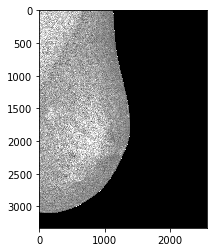

In [17]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
im = cv.filter2D(im, -1, kernel)
plt.imshow(im)

In [18]:
def unsharp_mask(image, kernel_size=(5, 5), sigma=1.0, amount=1.0, threshold=0):
    """Return a sharpened version of the image, using an unsharp mask."""
    blurred = cv.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened

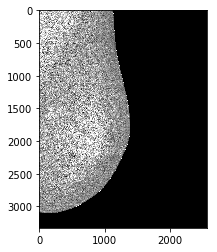

In [21]:
sharpened_image = unsharp_mask(im)
#cv.imwrite('my-sharpened-image.jpg', sharpened_image)
plt.imshow(sharpened_image)

# imadjust

In [22]:
def imadjust(x,a,b,c,d,gamma=1):
    # Similar to imadjust in MATLAB.
    # Converts an image range from [a,b] to [c,d].
    # The Equation of a line can be used for this transformation:
    #   y=((d-c)/(b-a))*(x-a)+c
    # However, it is better to use a more generalized equation:
    #   y=((x-a)/(b-a))^gamma*(d-c)+c
    # If gamma is equal to 1, then the line equation is used.
    # When gamma is not equal to 1, then the transformation is not linear.

    y = (((x - a) / (b - a)) ** gamma) * (d - c) + c
    return y

In [28]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

image = Image.open('test.png')
arr = np.asarray(image)
arr2=imadjust(arr,arr.min(),arr.max(),0,1,1)
fig = plt.figure()
fig.suptitle('image')
plt.imshow(arr2)
plt.show()


TypeError: imadjust() takes from 1 to 4 positional arguments but 6 were given

### Decorrstretch

In [35]:
import numpy as np
import cv2
from functools import reduce

def decorrstretch(A, tol=None):
    """
    Apply decorrelation stretch to image
    Arguments:
    A   -- image in cv2/numpy.array format
    tol -- upper and lower limit of contrast stretching
    """

    # save the original shape
    orig_shape = A.shape
    # reshape the image
    #         B G R
    # pixel 1 .
    # pixel 2   .
    #  . . .      .
    A = A.reshape((-1,3)).astype(np.float)
    # covariance matrix of A
    cov = np.cov(A.T)
    # source and target sigma
    sigma = np.diag(np.sqrt(cov.diagonal()))
    # eigen decomposition of covariance matrix
    eigval, V = np.linalg.eig(cov)
    # stretch matrix
    S = np.diag(1/np.sqrt(eigval))
    # compute mean of each color
    mean = np.mean(A, axis=0)
    # substract the mean from image
    A -= mean
    # compute the transformation matrix
    T = reduce(np.dot, [sigma, V, S, V.T])
    # compute offset 
    offset = mean - np.dot(mean, T)
    # transform the image
    A = np.dot(A, T)
    # add the mean and offset
    A += mean + offset
    # restore original shape
    B = A.reshape(orig_shape)
    # for each color...
    for b in range(3):
        # apply contrast stretching if requested
        if tol:
            # find lower and upper limit for contrast stretching
            low, high = np.percentile(B[:,:,b], 100*tol), np.percentile(B[:,:,b], 100-100*tol)
            B[B<low] = low
            B[B>high] = high
        # ...rescale the color values to 0..255
        B[:,:,b] = 255 * (B[:,:,b] - B[:,:,b].min())/(B[:,:,b].max() - B[:,:,b].min())
    # return it as uint8 (byte) image
    return B.astype(np.uint8)


In [38]:
decorrstretch_img = decorrstretch(im)
#cv.imwrite('my-sharpened-image.jpg', sharpened_image)
cv2.imshow("image",decorrstretch_img)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
